In [4]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
#importing required packages
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [5]:
#importing the data
df = pd.read_csv("/content/Agri_Data.csv")
df


FileNotFoundError: ignored

In [ ]:
#descriptive statistics
pandas_profiling.ProfileReport(df)


TypeError: ignored

In [ ]:
df.isna().sum()

District_Name       0
Season              0
Crop                0
N kg/ha             0
P  kg/ha            0
K  kg/ha            0
ph                  0
Humidity_Min        0
Humidity_Max        0
Humidity_around     0
Rainfall            2
Temp_around         0
Area                0
Production         34
dtype: int64

In [ ]:
df = df.drop(["Humidity_Max","Humidity_Min"], axis=1)


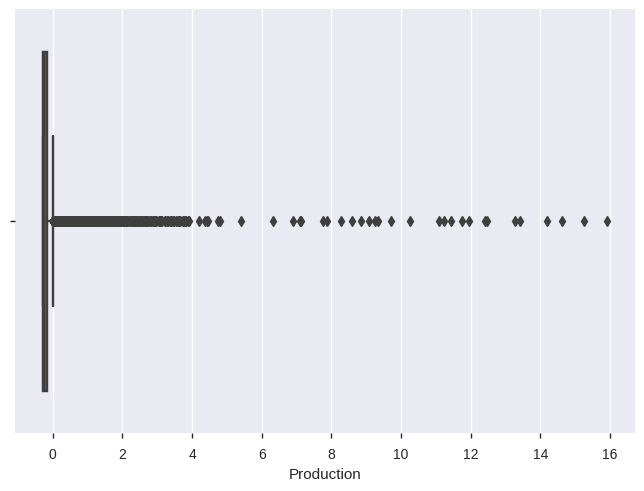

In [ ]:
import seaborn as sns
sns.boxplot(df.Production)

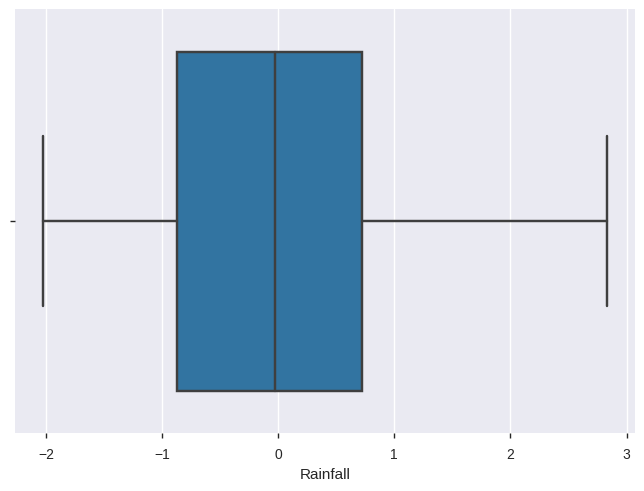

In [ ]:
import seaborn as sns 
sns.boxplot(df.Rainfall)

In [2]:
from sklearn.impute import SimpleImputer

In [3]:
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["Rainfall"] = pd.DataFrame(median_imputer.fit_transform(df[["Rainfall"]]))
df["Rainfall"].isna().sum() 

NameError: ignored

In [ ]:
# Median Imputer
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df["Production"] = pd.DataFrame(median_imputer.fit_transform(df[["Production"]]))
df["Production"].isna().sum()

In [ ]:
df.isna().sum()

District_Name      0
Season             0
Crop               0
N kg/ha            0
P  kg/ha           0
K  kg/ha           0
ph                 0
Humidity_around    0
Rainfall           0
Temp_around        0
Area               0
Production         0
dtype: int64

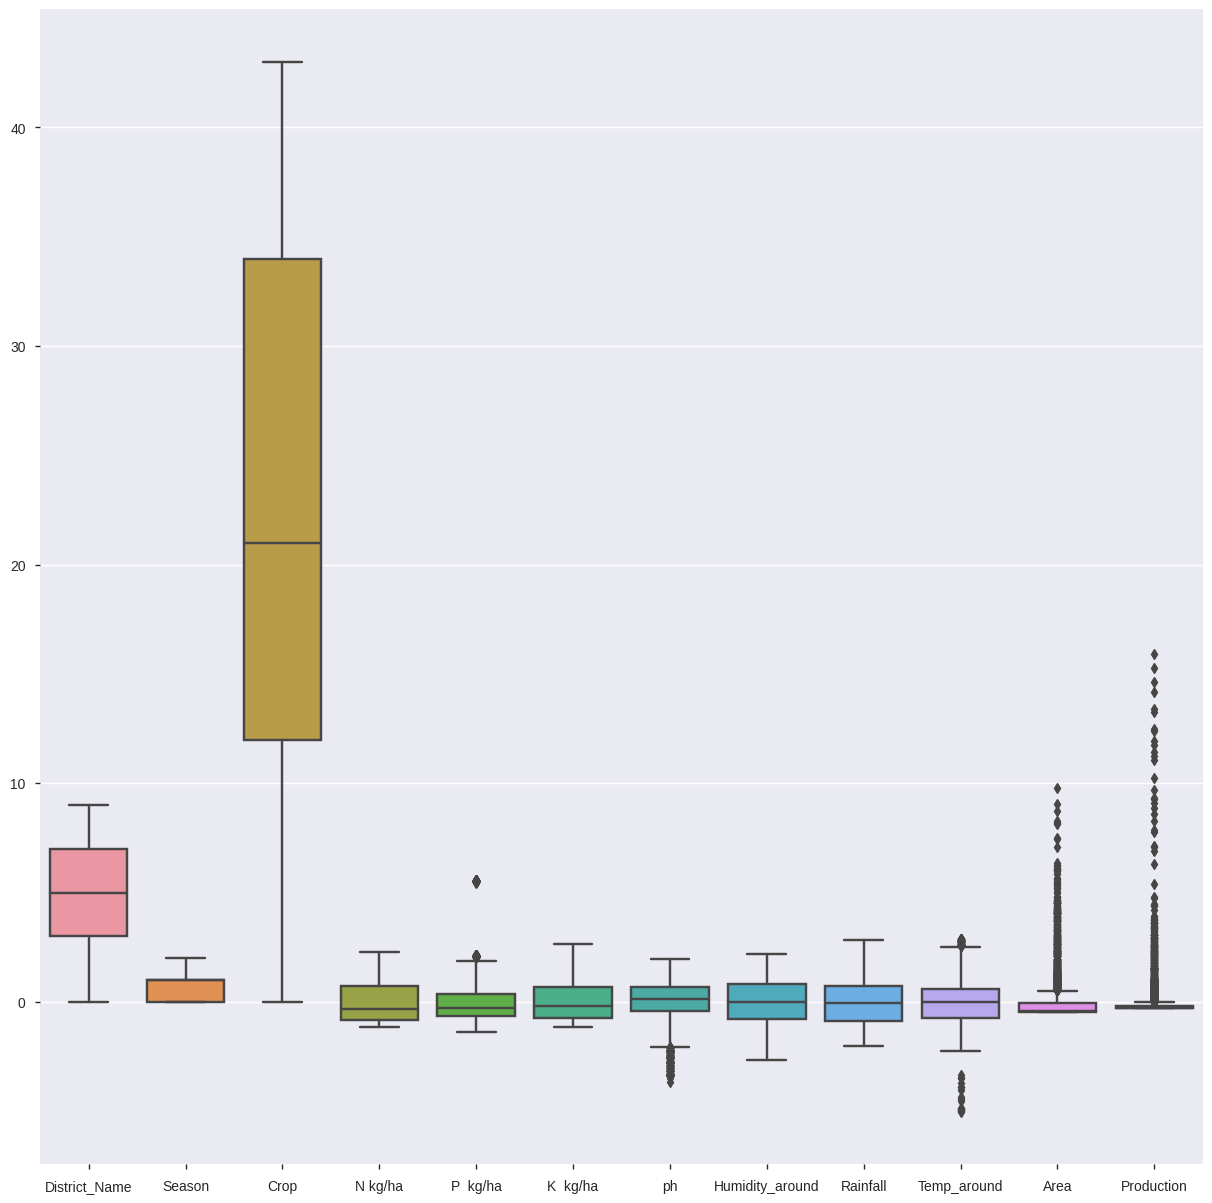

In [ ]:
fig=plt.figure(figsize=(15,15))
sns.boxplot(data=df)
plt.show()

In [ ]:
#replacing outliers by winsorization technique
!pip install feature_engine

     |████████████████████████████████| 205 kB 3.2 MB/s 
     |████████████████████████████████| 9.8 MB 519 kB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from feature_engine.outliers import Winsorizer
winsor=Winsorizer(capping_method='iqr', tail='both',fold=1.5,variables=['Rainfall','Production','Area','ph','Temp_around','P  kg/ha'])
df_t=winsor.fit_transform(df[['Rainfall','Area','ph','Temp_around','P  kg/ha','Production']])

In [ ]:
fig=plt.figure(figsize=(15,15))
sns.boxplot(data=df)
plt.show()

In [ ]:
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
label_encoder = preprocessing.LabelEncoder()

In [ ]:
df["Crop"]= label_encoder.fit_transform(df["Crop"]) 
df["Season"]= label_encoder.fit_transform(df["Season"]) 
df["District_Name"]= label_encoder.fit_transform(df["District_Name"]) 

In [ ]:
df

,District_Name,Season,Crop,N kg/ha,P kg/ha,K kg/ha,ph,Humidity_around,Rainfall,Temp_around,Area,Production
0,0,0,0,25.399955,44.023330,47.866532,7.109764,35.15,798.6,36.388150,32200,1100.0
1,0,0,0,25.942129,43.686642,46.978921,7.419597,30.70,1104.0,38.384425,35900,12700.0
2,0,1,0,25.481752,44.183059,47.628207,6.686975,37.40,985.8,39.089421,100,100.0
3,0,0,0,29.236268,43.543630,48.151850,7.505164,31.50,816.0,38.594861,38996,9437.0
4,0,1,0,27.062090,44.683242,48.497706,7.435820,43.60,967.0,40.990483,767,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4915,9,1,43,60.324727,29.907642,28.842461,6.966914,54.75,1280.0,22.171909,51,30.0
4916,9,1,43,60.077498,30.760258,30.008775,6.792731,28.15,1007.6,23.613905,45,24.0
4917,9,1,43,60.527319,30.894878,29.131273,6.107228,46.35,983.0,22.291382,36,30.0
4918,9,1,43,60.301643,29.267801,28.669416,6.253218,66.35,846.6,24.048036,45,42.0


In [ ]:
df.isna().sum()

District_Name      0
Season             0
Crop               0
N kg/ha            0
P  kg/ha           0
K  kg/ha           0
ph                 0
Humidity_around    0
Rainfall           0
Temp_around        0
Area               0
Production         0
dtype: int64

In [ ]:
#Normalizing The data
std_scale=StandardScaler()
std_scale
StandardScaler(copy=True,with_mean=True,with_std=True)
df['Rainfall']=std_scale.fit_transform(df[['Rainfall']])
df['Temp_around']=std_scale.fit_transform(df[['Temp_around']])
df['Humidity_around']=std_scale.fit_transform(df[['Humidity_around']])
df['N kg/ha']=std_scale.fit_transform(df[['N kg/ha']])
df['P  kg/ha']=std_scale.fit_transform(df[['P  kg/ha']])
df['K  kg/ha']=std_scale.fit_transform(df[['K  kg/ha']])
df['ph']=std_scale.fit_transform(df[['ph']])
df['Area']=std_scale.fit_transform(df[['Area']])
df['Production']=std_scale.fit_transform(df[['Production']])


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# creating dummies for gender
#df['Gender'] = df['ph'].map({'Male':0, 'Female':1})

# the independent variables set
X = df[['Season','Area','Production','N kg/ha', 'P  kg/ha', 'K  kg/ha',
       'ph', 'Humidity_around', 'Rainfall',
       'Temp_around',]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Crop"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
 for i in range(len(X.columns))]

print(vif_data)


              Crop       VIF
0           Season  1.096664
1             Area  1.499817
2       Production  1.452598
3          N kg/ha  3.986592
4         P  kg/ha  2.685173
5         K  kg/ha  4.964218
6               ph  1.158637
7  Humidity_around  1.004935
8         Rainfall  1.004333
9      Temp_around  1.242244


In [ ]:
df

,District_Name,Season,Crop,N kg/ha,P kg/ha,K kg/ha,ph,Humidity_around,Rainfall,Temp_around,Area,Production
0,0,0,0,-0.687820,0.307053,0.839440,0.861380,-1.369586,0.125692,1.959076,0.454469,-0.274350
1,0,0,0,-0.675008,0.290406,0.790427,1.203643,-1.613951,1.120263,2.354185,0.559301,-0.203369
2,0,1,0,-0.685888,0.314951,0.826280,0.394337,-1.246031,0.735331,2.493720,-0.455021,-0.280469
3,0,0,0,-0.597163,0.283334,0.855195,1.298167,-1.570021,0.182357,2.395835,0.647020,-0.223335
4,0,1,0,-0.648542,0.339682,0.874292,1.221565,-0.905567,0.674106,2.869984,-0.436123,-0.279943
...,...,...,...,...,...,...,...,...,...,...,...,...
4915,9,1,43,0.137504,-0.390893,-0.211045,0.703578,-0.293281,1.693428,-0.854645,-0.456410,-0.280897
4916,9,1,43,0.131662,-0.348736,-0.146643,0.511163,-1.753981,0.806325,-0.569241,-0.456580,-0.280934
4917,9,1,43,0.142292,-0.342079,-0.195097,-0.246093,-0.754554,0.726212,-0.830999,-0.456835,-0.280897
4918,9,1,43,0.136958,-0.422530,-0.220600,-0.084822,0.343716,0.282009,-0.483317,-0.456580,-0.280824


In [ ]:
X = df.drop(columns = ['Crop'])
y = df['Crop']

In [ ]:
# splitting the data into testing and training data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# scaling the data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# fitting data to model
#logistic  regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_train_acc = accuracy_score(y_train, lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Logistic Regression Model is {lr_train_acc}")
print(f"Test Accuracy of Logistic Regression Model is {lr_test_acc}")

Training Accuracy of Logistic Regression Model is 0.9024390243902439
Test Accuracy of Logistic Regression Model is 0.9154471544715447


In [ ]:
# confusion matrix 

confusion_matrix(y_test, y_pred)

array([[51,  0,  0, ...,  0,  0,  0],
       [ 0, 37,  0, ...,  0,  0,  1],
       [ 0,  0,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 21,  0,  0],
       [ 0,  0,  0, ...,  0, 46,  0],
       [ 0,  0,  0, ...,  0,  0, 16]], dtype=int64)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#knn 
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN Model is {knn_train_acc}")
print(f"Test Accuracy of KNN Model is {knn_test_acc}")

Training Accuracy of KNN Model is 0.8520325203252033
Test Accuracy of KNN Model is 0.7634146341463415


In [ ]:
from sklearn.svm import SVC
#svc
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SVC Model is {svc_train_acc}")
print(f"Test Accuracy of SVC Model is {svc_test_acc}")

Training Accuracy of SVC Model is 0.9105691056910569
Test Accuracy of SVC Model is 0.8943089430894309


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#decision tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decision Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decision Tree Model is {dtc_test_acc}")

Training Accuracy of Decision Tree Model is 1.0
Test Accuracy of Decision Tree Model is 0.9780487804878049


In [ ]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 3}
0.9791327913279133


In [ ]:
#grid
dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Decesion Tree Model is {dtc_train_acc}")
print(f"Test Accuracy of Decesion Tree Model is {dtc_test_acc}")

Training Accuracy of Decesion Tree Model is 0.9937669376693767
Test Accuracy of Decesion Tree Model is 0.9821138211382113


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'gini', max_depth = 8, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 5, n_estimators = 150)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Random Forest Model is {rand_clf_train_acc}")
print(f"Test Accuracy of Random Forest Model is {rand_clf_test_acc}")

Training Accuracy of Random Forest Model is 0.9672086720867209
Test Accuracy of Random Forest Model is 0.9544715447154472


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [90, 120, 180],
    'learning_rate' : [ 0.01, 0.1, 1],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train, y_train)

In [ ]:
# best parameter and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate =0.0001, n_estimators = 960)
ada.fit(X_train, y_train)

ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Ada Boost Model is {ada_train_acc}")
print(f"Test Accuracy of Ada Boost Model is {ada_test_acc}")

In [ ]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150]
}

grid_search = GridSearchCV(gb, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

In [ ]:
#stohastic gradient boosting
sgbc = GradientBoostingClassifier(learning_rate = 0.001, subsample = 0.9, max_features = 0.65, loss = 'deviance',
                                  n_estimators = 150)

sgbc.fit(X_train, y_train)

y_pred = sgbc.predict(X_test)

sgbc_train_acc = accuracy_score(y_train, sgbc.predict(X_train))
sgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of SGB Model is {sgbc_train_acc}")
print(f"Test Accuracy of SGB Model is {sgbc_test_acc}")

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster = 'gblinear', learning_rate = .1, max_depth = 3, n_estimators = 750)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

xgb_train_acc = accuracy_score(y_train, xgb.predict(X_train))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of XGB Model is {xgb_train_acc}")
print(f"Test Accuracy of XGB Model is {xgb_test_acc}")

In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 100, learning_rate = 0.3, n_jobs = 1)

xgb_clf.fit(X_train, y_train)


# In[47]:


confusion_matrix(y_test, xgb_clf.predict(X_test))


# In[48]:


xgb_train = accuracy_score(y_train, xgb_clf.predict(X_train))
xgb_train


# In[49]:


xgb_test = accuracy_score(y_test, xgb_clf.predict(X_test))
xgb_test


# In[50]:


xgb.plot_importance(xgb_clf)

NameError: ignored

In [ ]:
models = [ 'KNN', 'SVC', 'Decision Tree', 'Random Forest','Ada Boost', 'SGB', 'XgBoost']
scores = [ knn_test_acc, svc_test_acc, dtc_test_acc, rand_clf_test_acc, ada_test_acc, sgbc_test_acc, xgb_test_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})


models.sort_values(by = 'Score', ascending = False)

In [ ]:
plt.figure(figsize = (18, 8))

sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

In [ ]:
df.columns